In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv("E:\\jan.csv")

In [5]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 100)

In [6]:
df["delayflag"] = df["delayflag"].astype("category")

In [7]:
df['delayflag'].value_counts()

提前    982381
晚点    815381
正点    586879
Name: delayflag, dtype: int64

In [8]:
df['arrtime'] = df.apply(lambda x : x['deptime'] if x['arrtime']=='start' else x['arrtime'], axis=1)
df['deptime'] = df.apply(lambda x : x['arrtime'] if x['deptime']=='end' else x['deptime'], axis=1)

df['arrtime'] = pd.to_datetime(df['arrtime'], format='%Y-%m-%d %H:%M')
df['deptime'] = pd.to_datetime(df['deptime'], format='%Y-%m-%d %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384641 entries, 0 to 2384640
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   realtrainnum  object        
 1   arrtime       datetime64[ns]
 2   deptime       datetime64[ns]
 3   code          object        
 4   stationname   object        
 5   delayflag     category      
 6   delaydetail   int64         
dtypes: category(1), datetime64[ns](2), int64(1), object(3)
memory usage: 111.4+ MB


In [10]:
df['stay_time'] = ((df['deptime'] - df['arrtime']).dt.seconds.astype('int16'))/60 # 只能转化成天数，秒和微秒

In [11]:
df['month'] = df['arrtime'].dt.month
df['date'] = df['arrtime'].dt.date
df['week'] = df['arrtime'].dt.dayofweek
df['hour'] = df['arrtime'].dt.hour

In [12]:
df['type'] = df['realtrainnum'].str.get(0)
df['type'] = df['type'].str.replace(r"\d+\.?\d*", 'P', regex=True)

In [13]:
df

,realtrainnum,arrtime,deptime,code,stationname,delayflag,delaydetail,stay_time,month,date,week,hour,type
0,1133,2020-01-04 18:22:00,2020-01-04 18:26:00,XYP,下花园,晚点,25,4.0,1,2020-01-04,5,18,P
1,1133,2020-01-05 08:39:00,2020-01-05 08:47:00,BTC,包头,晚点,2,8.0,1,2020-01-05,6,8,P
2,1133,2020-01-05 10:29:00,2020-01-05 10:55:00,WYC,五原,晚点,3,26.0,1,2020-01-05,6,10,P
3,1133,2020-01-06 12:16:00,2020-01-06 12:19:00,BAC,巴彦高勒,晚点,8,3.0,1,2020-01-06,0,12,P
4,1133,2020-01-12 19:15:00,2020-01-12 19:26:00,ZMP,张家口,提前,3,11.0,1,2020-01-12,6,19,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384636,Z99,2020-01-15 17:45:00,2020-01-15 17:45:00,SHH,上海,正点,0,0.0,1,2020-01-15,2,17,Z
2384637,Z99,2020-01-03 10:06:00,2020-01-03 10:06:00,GGQ,广州东,提前,10,0.0,1,2020-01-03,4,10,Z
2384638,Z99,2020-01-09 10:06:00,2020-01-09 10:06:00,GGQ,广州东,提前,15,0.0,1,2020-01-09,3,10,Z
2384639,Z99,2020-01-15 02:57:00,2020-01-15 03:14:00,ZZQ,株洲,提前,2,17.0,1,2020-01-15,2,2,Z


In [14]:
import matplotlib
font = {'family': 'SimHei'}
matplotlib.rc('font', **font)

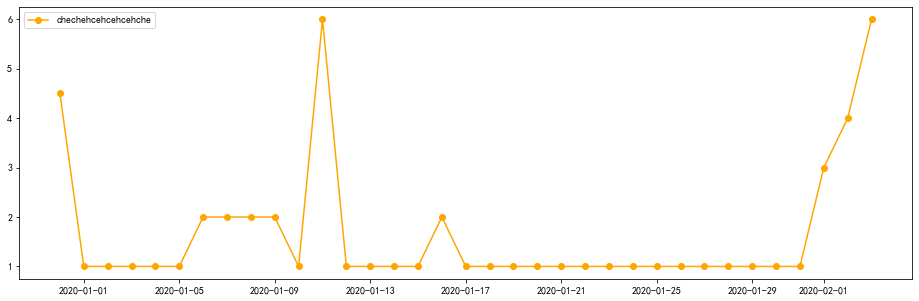

In [15]:
group_date = df.groupby('date')['delaydetail'].median()
group_date.index = pd.to_datetime(group_date.index)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))
plt.plot(group_date.index, group_date.values, '-o', color='orange', label='chechehcehcehcehche')
plt.legend()
plt.show()